## Table of Content
1. **[Merging and Joining](#Merging)**
2. **[Concatenate](#Concatenate)**
3. **[Reshaping the Dataframe](#Reshaping)**
4. **[Pivot Table](#Pivote)**
5. **[Duplicate](#Duplicate)**
6. **[Map and Reduce](#Map)**
7. **[Groupby in Pandas](#Groupby)**


### 1. Concatenate
Concatenation is a process of joining objects along a particular axis, with set logic applied along the other axes, if any (a series doesn’t have any other axes).<br>
                   The main parameters involved in the pandas concatenation are - object, axis, handling of other axes, and keys.


**Syntax of Concatenate:**<br><br>
pd.concat(objs,axis=0,join='outer',join_axes=None,ignore_index=False)<br>

objs − This is a sequence or mapping of Series, DataFrame, or Panel objects.

axis − {0, 1, ...}, default 0. This is the axis to concatenate along.

join − {‘inner’, ‘outer’}, default ‘outer’. How to handle indexes on other axis. Outer for union and inner for intersection.

ignore_index − boolean, default False. If True, do not use the index values on the concatenation axis. The resulting axis will be labeled 0, ..., n - 1.

join_axes − This is the list of Index objects. Specific indexes to use for the other (n-1) axes instead of performing inner/outer set logic.

**Concatenate Pandas Series**

In [1]:
import pandas as pd

In [2]:
# create a series
series_a = pd.Series([101,102,103,104,105,106])
series_b = pd.Series([107,108,109,110,111,112])

In [3]:
# concatenate the pandas series
pd.concat([series_a,series_b])

0    101
1    102
2    103
3    104
4    105
5    106
0    107
1    108
2    109
3    110
4    111
5    112
dtype: int64

**Add a Hierarchical Index on Pandas Series**

In [4]:
pd.concat([series_a,series_b], keys = ['a', 'b'])

a  0    101
   1    102
   2    103
   3    104
   4    105
   5    106
b  0    107
   1    108
   2    109
   3    110
   4    111
   5    112
dtype: int64

**Label the Index**

In [5]:
# 'names' parameter assigns labels to 'keys' and 'indices'
pd.concat([series_a, series_b], keys=['a', 'b'], names=['Series', 'Row ID'])

Series  Row ID
a       0         101
        1         102
        2         103
        3         104
        4         105
        5         106
b       0         107
        1         108
        2         109
        3         110
        4         111
        5         112
dtype: int64

**Concatenating Dataframes**

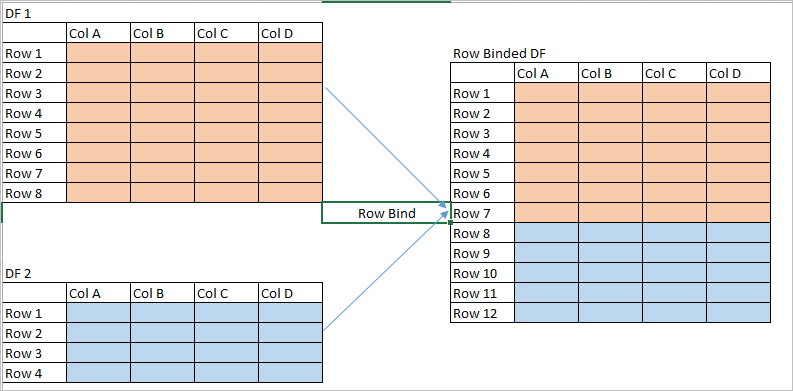

In [6]:
df_1 = pd.DataFrame({
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'Company':['Apple','Walmart','Intel','cummins','Ford'],
   'Salary':[67000,90000,87000,69000,78000]},
   index=[101,102,103,104,105])

print("The first dataframe is : \n",df_1, "\n\n")

df_2 = pd.DataFrame({
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'Company':['Cognizant','Apple','Intel','Cummins','Walmart'],
   'Salary':[89000,80000,79000,97000,88000]},
   index=[101,102,103,104,105])

print("The second dataframe is : \n",df_2)

The first dataframe is : 
        Name  Company  Salary
101    Alex    Apple   67000
102     Amy  Walmart   90000
103   Allen    Intel   87000
104   Alice  cummins   69000
105  Ayoung     Ford   78000 


The second dataframe is : 
       Name    Company  Salary
101  Billy  Cognizant   89000
102  Brian      Apple   80000
103   Bran      Intel   79000
104  Bryce    Cummins   97000
105  Betty    Walmart   88000


**Concatenating Pandas Dataframes using `.concat()`**

In [7]:
# concatenate the dataframe
print(pd.concat([df_1,df_2]))

       Name    Company  Salary
101    Alex      Apple   67000
102     Amy    Walmart   90000
103   Allen      Intel   87000
104   Alice    cummins   69000
105  Ayoung       Ford   78000
101   Billy  Cognizant   89000
102   Brian      Apple   80000
103    Bran      Intel   79000
104   Bryce    Cummins   97000
105   Betty    Walmart   88000


**Concatenating Pandas Dataframes Horizontally**

In [8]:
pd.concat([df_1,df_2], axis=1)

,Name,Company,Salary,Name,Company,Salary
101,Alex,Apple,67000,Billy,Cognizant,89000
102,Amy,Walmart,90000,Brian,Apple,80000
103,Allen,Intel,87000,Bran,Intel,79000
104,Alice,cummins,69000,Bryce,Cummins,97000
105,Ayoung,Ford,78000,Betty,Walmart,88000


**Concatenating dataframes ignoring index values**

In [9]:
pd.concat([df_1,df_2], ignore_index=True)

,Name,Company,Salary
0,Alex,Apple,67000
1,Amy,Walmart,90000
2,Allen,Intel,87000
3,Alice,cummins,69000
4,Ayoung,Ford,78000
5,Billy,Cognizant,89000
6,Brian,Apple,80000
7,Bran,Intel,79000
8,Bryce,Cummins,97000
9,Betty,Walmart,88000


**Concatenating Pandas Dataframes using `.append()`**

In [10]:
df_1.append(df_2)

,Name,Company,Salary
101,Alex,Apple,67000
102,Amy,Walmart,90000
103,Allen,Intel,87000
104,Alice,cummins,69000
105,Ayoung,Ford,78000
101,Billy,Cognizant,89000
102,Brian,Apple,80000
103,Bran,Intel,79000
104,Bryce,Cummins,97000
105,Betty,Walmart,88000


<a id="Merging"> </a>
### 2. Merging and Joining
<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>"Merging" two datasets is the process of bringing two datasets together into one, and aligning the rows from each based on common attributes or columns.<br>
                    This is achieved by the parameter “on” which allow us to select the common column between two dataframes.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Concatenate using `.merge()`

In [11]:
my_df1=pd.DataFrame({
 'Product_ID':[101,102,103,104,105,106],
 'Food_Product':['Cakes','Biscuits','Fruit','Beverages','Cakes','Beverages'],
 'Brand':['Baskin Robbins','Blue Riband','Peach','Horlicks','Mars Muffin','Mirinda'], 
})
print("The first dataframe is : \n",my_df1,"\n\n")

my_df2=pd.DataFrame({
 'Product_ID':[104,102,101,103,107,108],
 'Food_Product':['Beverages', 'Biscuits', 'Cakes', 'Fruit', 'Breakfast foods', 'Chips'],
  'Brand':['Coca-Cola', 'Oreo', 'Dunkin Donuts', 'Banana', 'Cream of Wheat', 'Cheetos']  
})
print("The second dataframe is : \n",my_df2)

The first dataframe is : 
    Product_ID Food_Product           Brand
0         101        Cakes  Baskin Robbins
1         102     Biscuits     Blue Riband
2         103        Fruit           Peach
3         104    Beverages        Horlicks
4         105        Cakes     Mars Muffin
5         106    Beverages         Mirinda 


The second dataframe is : 
    Product_ID     Food_Product           Brand
0         104        Beverages       Coca-Cola
1         102         Biscuits            Oreo
2         101            Cakes   Dunkin Donuts
3         103            Fruit          Banana
4         107  Breakfast foods  Cream of Wheat
5         108            Chips         Cheetos


In [12]:
pd.merge(my_df1, my_df2, on='Product_ID')

,Product_ID,Food_Product_x,Brand_x,Food_Product_y,Brand_y
0,101,Cakes,Baskin Robbins,Cakes,Dunkin Donuts
1,102,Biscuits,Blue Riband,Biscuits,Oreo
2,103,Fruit,Peach,Fruit,Banana
3,104,Beverages,Horlicks,Beverages,Coca-Cola


The output displays the common 'Product_ID' in the two dataframes.

**Merging Using Multiple Keys**

In [13]:
 pd.merge(my_df1, my_df2, on=['Product_ID','Food_Product'])

,Product_ID,Food_Product,Brand_x,Brand_y
0,101,Cakes,Baskin Robbins,Dunkin Donuts
1,102,Biscuits,Blue Riband,Oreo
2,103,Fruit,Peach,Banana
3,104,Beverages,Horlicks,Coca-Cola


**Merging on the Basis of Index**

This function helps to merge two dataframes, based on the index of both of them

In [14]:
pd.merge(my_df1, my_df2, right_index=True, left_index=True)

,Product_ID_x,Food_Product_x,Brand_x,Product_ID_y,Food_Product_y,Brand_y
0,101,Cakes,Baskin Robbins,104,Beverages,Coca-Cola
1,102,Biscuits,Blue Riband,102,Biscuits,Oreo
2,103,Fruit,Peach,101,Cakes,Dunkin Donuts
3,104,Beverages,Horlicks,103,Fruit,Banana
4,105,Cakes,Mars Muffin,107,Breakfast foods,Cream of Wheat
5,106,Beverages,Mirinda,108,Chips,Cheetos


merge() allows you to perform natural join, left join, right join, and full outer join in pandas.

**Understanding the Different Types of Merge:**

Natural join: It keeps only rows that match the dataframes. (how=‘inner’).

Full outer join: It keeps all rows from both dataframes. (how=‘outer’).

Left outer join: To include all the rows of your dataframe x and only those from y that match. (how=‘left’).

Right outer join: To include all the rows of your dataframe y and only those from x that match. (how=‘right’).

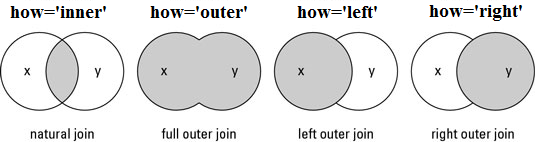

**Inner Join:**<br>
It returns only the rows in which the left table has matching keys in the right table.

In [15]:
print (pd.merge(my_df1, my_df2, on='Product_ID', how='inner'))

   Product_ID Food_Product_x         Brand_x Food_Product_y        Brand_y
0         101          Cakes  Baskin Robbins          Cakes  Dunkin Donuts
1         102       Biscuits     Blue Riband       Biscuits           Oreo
2         103          Fruit           Peach          Fruit         Banana
3         104      Beverages        Horlicks      Beverages      Coca-Cola


**Outer Join:**<br>
It returns all rows from both tables, joining records from the left, which has matching keys in the right table.

In [16]:
print (pd.merge(my_df1, my_df2, on='Product_ID', how='outer'))

   Product_ID Food_Product_x         Brand_x   Food_Product_y         Brand_y
0         101          Cakes  Baskin Robbins            Cakes   Dunkin Donuts
1         102       Biscuits     Blue Riband         Biscuits            Oreo
2         103          Fruit           Peach            Fruit          Banana
3         104      Beverages        Horlicks        Beverages       Coca-Cola
4         105          Cakes     Mars Muffin              NaN             NaN
5         106      Beverages         Mirinda              NaN             NaN
6         107            NaN             NaN  Breakfast foods  Cream of Wheat
7         108            NaN             NaN            Chips         Cheetos


**Left Outer Join:**<br>
It returns all rows from the left table, and any rows with matching keys from the right table.

In [17]:
print (pd.merge(my_df1, my_df2, on='Product_ID', how='left'))

   Product_ID Food_Product_x         Brand_x Food_Product_y        Brand_y
0         101          Cakes  Baskin Robbins          Cakes  Dunkin Donuts
1         102       Biscuits     Blue Riband       Biscuits           Oreo
2         103          Fruit           Peach          Fruit         Banana
3         104      Beverages        Horlicks      Beverages      Coca-Cola
4         105          Cakes     Mars Muffin            NaN            NaN
5         106      Beverages         Mirinda            NaN            NaN


**Right Outer Join:**<br>
It returns all rows from the right table, and any rows with matching keys from the left table.

In [18]:
print(pd.merge(my_df1, my_df2, on='Product_ID', how='right'))

   Product_ID Food_Product_x         Brand_x   Food_Product_y         Brand_y
0         101          Cakes  Baskin Robbins            Cakes   Dunkin Donuts
1         102       Biscuits     Blue Riband         Biscuits            Oreo
2         103          Fruit           Peach            Fruit          Banana
3         104      Beverages        Horlicks        Beverages       Coca-Cola
4         107            NaN             NaN  Breakfast foods  Cream of Wheat
5         108            NaN             NaN            Chips         Cheetos


<a id="Reshaping"> </a>
### 3. Reshaping

**`.stack()` and `.unstack()` in Pandas:**<br>
 Reshaping the data using stack() function in pandas converts the data into a stacked format. When more than one column header is present we can stack the specific column header by specifying the level. The unstack() function converts the data into the unstacked format. Let’s see with an example.

### Methods of Multi-Index Creation

In [19]:
header = pd.MultiIndex.from_product([['Before Course','After Course'],['Marks']])
d=([[82,95],[78,89],[78,87],[76,89],[66,89]])
 
 
my_df = pd.DataFrame(d,
                  index=['Alisa','Bobby','Cathrine','Jack','Mia'],
                  columns=header)
my_df

,Before Course,After Course
,Marks,Marks
Alisa,82,95
Bobby,78,89
Cathrine,78,87
Jack,76,89
Mia,66,89


In [20]:
df_stacked = my_df.stack()
print(df_stacked)

                After Course  Before Course
Alisa    Marks            95             82
Bobby    Marks            89             78
Cathrine Marks            87             78
Jack     Marks            89             76
Mia      Marks            89             66


Notice this creates a more complex index which has two levels the first level is index, and the second level is the data. This is called a multi-index. We can convert back to wide table with unstack. This recreates a single index for each line of data.

In [21]:
df_unstacked = df_stacked.unstack()
print (df_unstacked)

         After Course Before Course
                Marks         Marks
Alisa              95            82
Bobby              89            78
Cathrine           87            78
Jack               89            76
Mia                89            66


`.stack()` function with level 0 argument stacks the column marks after the course and before the course.

In [22]:
stacked_df_level = my_df.stack(level=0)
stacked_df_level

Marks
Alisa    After Course      95
         Before Course     82
Bobby    After Course      89
         Before Course     78
Cathrine After Course      87
         Before Course     78
Jack     After Course      89
         Before Course     76
Mia      After Course      89
         Before Course     66

In [23]:
stacked_df_level = my_df.stack(level=1)
stacked_df_level

,,After Course,Before Course
Alisa,Marks,95,82
Bobby,Marks,89,78
Cathrine,Marks,87,78
Jack,Marks,89,76
Mia,Marks,89,66


<a id="Pivote"> </a>
### 4. Pivot Table
The pivot function is used to create a new derived table out of a given one. Pivot takes 3 arguments with the following names: index, columns, and values.

In [24]:
sales = {'Months': ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],
        'Sales': [22000,27000,25000,29000,35000,67000,78000,67000,56000,56000,89000,60000],
         'Seasons': ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Fall','Fall','Fall','Winter']
        }
df_sales = pd.DataFrame(sales, columns= ['Months', 'Sales','Seasons'])
df_sales

,Months,Sales,Seasons
0,Jan,22000,Winter
1,Feb,27000,Winter
2,Mar,25000,Spring
3,Apr,29000,Spring
4,May,35000,Spring
5,June,67000,Summer
6,July,78000,Summer
7,Aug,67000,Summer
8,Sep,56000,Fall
9,Oct,56000,Fall


The simplest pivot table must have a dataframe and an index . In this case, let’s use the 'Months' as our index.

In [25]:
pd.pivot_table(df_sales,index=["Months"])

,Sales
Months,
Apr,29000
Aug,67000
Dec,60000
Feb,27000
Jan,22000
July,78000
June,67000
Mar,25000
May,35000


You can have multiple indexes as well. In fact, most of the pivot_table args can take multiple values via a list.

In [26]:
pd.pivot_table(df_sales,index=["Months", "Seasons"])

,,Sales
Months,Seasons,
Apr,Spring,29000
Aug,Summer,67000
Dec,Winter,60000
Feb,Winter,27000
Jan,Winter,22000
July,Summer,78000
June,Summer,67000
Mar,Spring,25000
May,Spring,35000


In [27]:
pd.pivot_table(df_sales,index=["Seasons"],values=["Sales"])

,Sales
Seasons,
Fall,67000.000000
Spring,29666.666667
Summer,70666.666667
Winter,36333.333333


The sale column automatically averages the data but we can do a count or a sum. Adding them is done using `aggfunc` and `np.sum`.

<a id="Duplicate"> </a>
### 5. Duplicate

In [28]:
# Create a DataFrame
d = {
    'Name':['Alisa','Bobby','jodha','jack','raghu','Cathrine',
            'Alisa','Bobby','kumar','Alisa','Alex','Cathrine'],
    'Company':['Apple','Walmart','Walmart','Intel','Apple','Walmart','Apple','Cognizant','Apple','Apple','Cognizant','Walmart'],
      
       'Salary':[8500,6300,5500,7400,3100,7700,8500,6300,4200,6200,8900,7700]}
 
df = pd.DataFrame(d,columns=['Name','Company','Salary'])
df

,Name,Company,Salary
0,Alisa,Apple,8500
1,Bobby,Walmart,6300
2,jodha,Walmart,5500
3,jack,Intel,7400
4,raghu,Apple,3100
5,Cathrine,Walmart,7700
6,Alisa,Apple,8500
7,Bobby,Cognizant,6300
8,kumar,Apple,4200
9,Alisa,Apple,6200


**Duplicate Rows Based on All Columns**

In [29]:
# Select duplicate rows except first occurrence based on all columns
duplicate_df = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicate_df)

Duplicate Rows except first occurrence based on all columns are :
        Name  Company  Salary
6      Alisa    Apple    8500
11  Cathrine  Walmart    7700


**Duplicate Rows Based on Selected Columns**

Let’s find & select rows based on a single column.

In [30]:
duplicate_df = df[df.duplicated('Name')]
print(duplicate_df)

        Name    Company  Salary
6      Alisa      Apple    8500
7      Bobby  Cognizant    6300
9      Alisa      Apple    6200
11  Cathrine    Walmart    7700


Find & select rows based on a two column names.

In [31]:
duplicate_df = df[df.duplicated(['Name', 'Company'])]
print(duplicate_df)

        Name  Company  Salary
6      Alisa    Apple    8500
9      Alisa    Apple    6200
11  Cathrine  Walmart    7700


**Dropping the Duplicate Rows**

In [32]:
df.drop_duplicates()

,Name,Company,Salary
0,Alisa,Apple,8500
1,Bobby,Walmart,6300
2,jodha,Walmart,5500
3,jack,Intel,7400
4,raghu,Apple,3100
5,Cathrine,Walmart,7700
7,Bobby,Cognizant,6300
8,kumar,Apple,4200
9,Alisa,Apple,6200
10,Alex,Cognizant,8900


<a id="Map"> </a>
### 6. Map and Replace

**`.map()`:**<br>
`.map()` function is used to create a new column by mapping the dataframe column values with the dictionary Key.

In [33]:
# create a dataframe
df= pd.DataFrame({'Country':['China','India','USA','Indonesia','Brazil'],
                  'Population':[1403500365,1324171354,322179605,261115456,207652865]})
df

,Country,Population
0,China,1403500365
1,India,1324171354
2,USA,322179605
3,Indonesia,261115456
4,Brazil,207652865


In [34]:
# create a dictionary
capital = {
'Germany':'Berlin',
'Brazil':'Brasília',
'Hungary':'Budapest',
'China':'Beijing',
'India':'New Delhi',
'Norway':'Oslo',
'France':'Paris',
'Indonesia': 'Jakarta',
'USA':'Washington'
}

Create a new column called capital in the dataframe matching the Key value pair from the country column.

In [35]:
df['Capital'] = df['Country'].map(capital)
df

,Country,Population,Capital
0,China,1403500365,Beijing
1,India,1324171354,New Delhi
2,USA,322179605,Washington
3,Indonesia,261115456,Jakarta
4,Brazil,207652865,Brasília


**replace():**<br>
It is used to replace any value in the dataframe.

In [36]:
df = pd.DataFrame({'col1':[23, 10, 20],
                   'col2': [67, 30, 56]},
                  index=[1,2,0])
print(df)

   col1  col2
1    23    67
2    10    30
0    20    56


In [37]:
dict1 = {10: "A", 20: "B"}

# The values 10 and 20 are replaced by 'A' and 'B'
df['col1'].replace(dict1, inplace=True)

print(df)

  col1  col2
1   23    67
2    A    30
0    B    56


<a id="Groupby"> </a>
### 7. Groupby in Pandas

In [38]:
# create a dataframe
my_df1=pd.DataFrame({
 'Product_ID':[101,102,103,104,105,106],
 'Food_Product':['Cakes','Biscuits','Fruit','Beverages','Cakes','Beverages'],
 'Brand':['Baskin Robbins','Blue Riband','Peach','Horlicks','Mars Muffin','Mirinda'],
 'Sales': [5000, 8000, 7600, 5500, 6500, 9000],
 'Profit': [55000, 67000, 89000, 78000, 55000, 90000]   
})
print(my_df1)

   Product_ID Food_Product           Brand  Sales  Profit
0         101        Cakes  Baskin Robbins   5000   55000
1         102     Biscuits     Blue Riband   8000   67000
2         103        Fruit           Peach   7600   89000
3         104    Beverages        Horlicks   5500   78000
4         105        Cakes     Mars Muffin   6500   55000
5         106    Beverages         Mirinda   9000   90000


In [39]:
my_df1

,Product_ID,Food_Product,Brand,Sales,Profit
0,101,Cakes,Baskin Robbins,5000,55000
1,102,Biscuits,Blue Riband,8000,67000
2,103,Fruit,Peach,7600,89000
3,104,Beverages,Horlicks,5500,78000
4,105,Cakes,Mars Muffin,6500,55000
5,106,Beverages,Mirinda,9000,90000


**Number of Unique Column Values Per Group**

In [40]:
my_df1.groupby("Food_Product")["Sales"].nunique().to_frame()

,Sales
Food_Product,
Beverages,2
Biscuits,1
Cakes,2
Fruit,1


**Sort Groupby Results**

Turn the groupby object into a regular dataframe by calling `.to_frame()` and then re-index with `reset_index()`, then you can also call sort_values() as you would do for a normal dataframe.

In [41]:
my_df1.groupby('Food_Product')['Sales'].sum().to_frame().reset_index()

,Food_Product,Sales
0,Beverages,14500
1,Biscuits,8000
2,Cakes,11500
3,Fruit,7600


In [42]:
my_df1.groupby('Food_Product')['Sales'].sum().to_frame().reset_index().sort_values(by='Sales')

,Food_Product,Sales
3,Fruit,7600
1,Biscuits,8000
2,Cakes,11500
0,Beverages,14500


**Hierarchical Indices Created by Groupby**

In [43]:
my_df1.groupby('Food_Product').agg({'Sales':['min','max','mean']})

Sales            
               min   max  mean
Food_Product                  
Beverages     5500  9000  7250
Biscuits      8000  8000  8000
Cakes         5000  6500  5750
Fruit         7600  7600  7600